In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
#https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data

In [189]:
df = pd.read_csv("data/country_data.csv")

In [190]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [192]:
df[df["country"]=="Turkey"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700


In [193]:
df[(df["gdpp"] >= df["gdpp"].mean()) & (df["child_mort"] < df["child_mort"].mean())].count()

country       44
child_mort    44
exports       44
health        44
imports       44
income        44
inflation     44
life_expec    44
total_fer     44
gdpp          44
dtype: int64

In [194]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


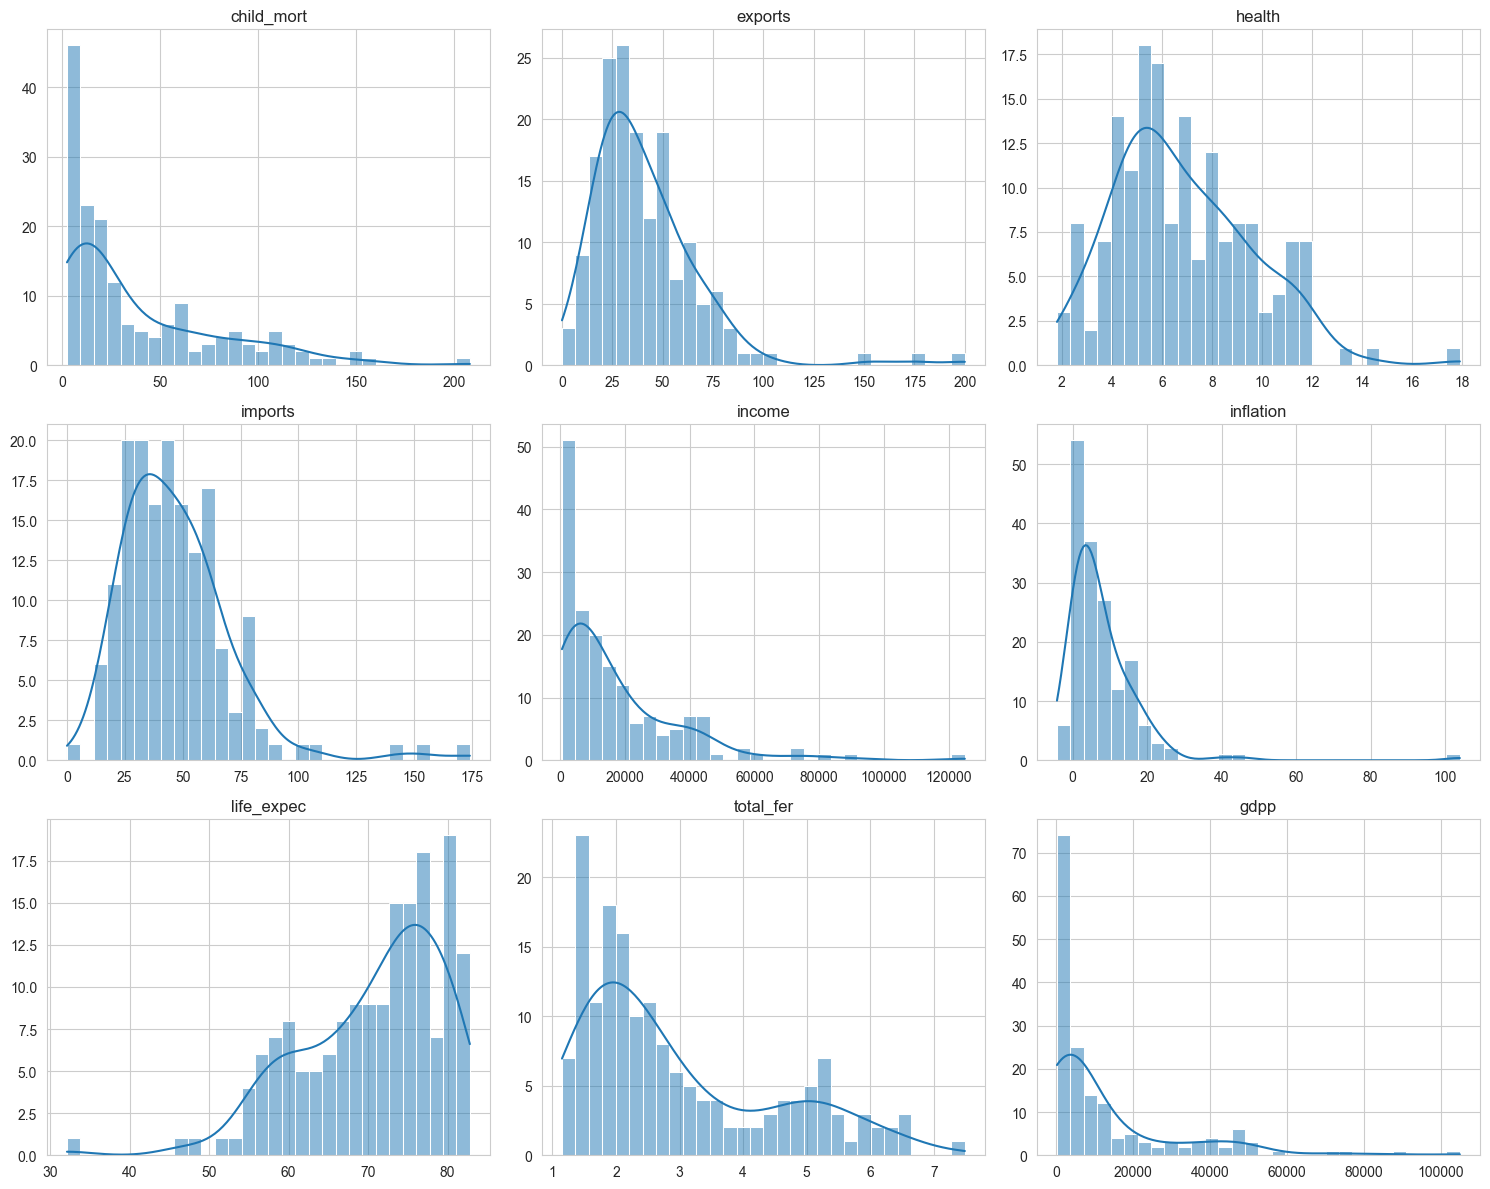

In [195]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = math.ceil(math.sqrt(len(num_cols)))
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

plot_all_histograms(df)

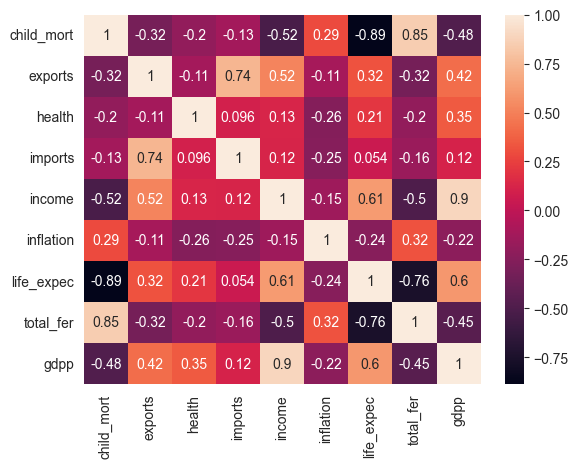

In [196]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [197]:
df2 = df.drop("country", axis=1)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [198]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df2)

In [199]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [200]:
df2 = pd.DataFrame(df2, columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])

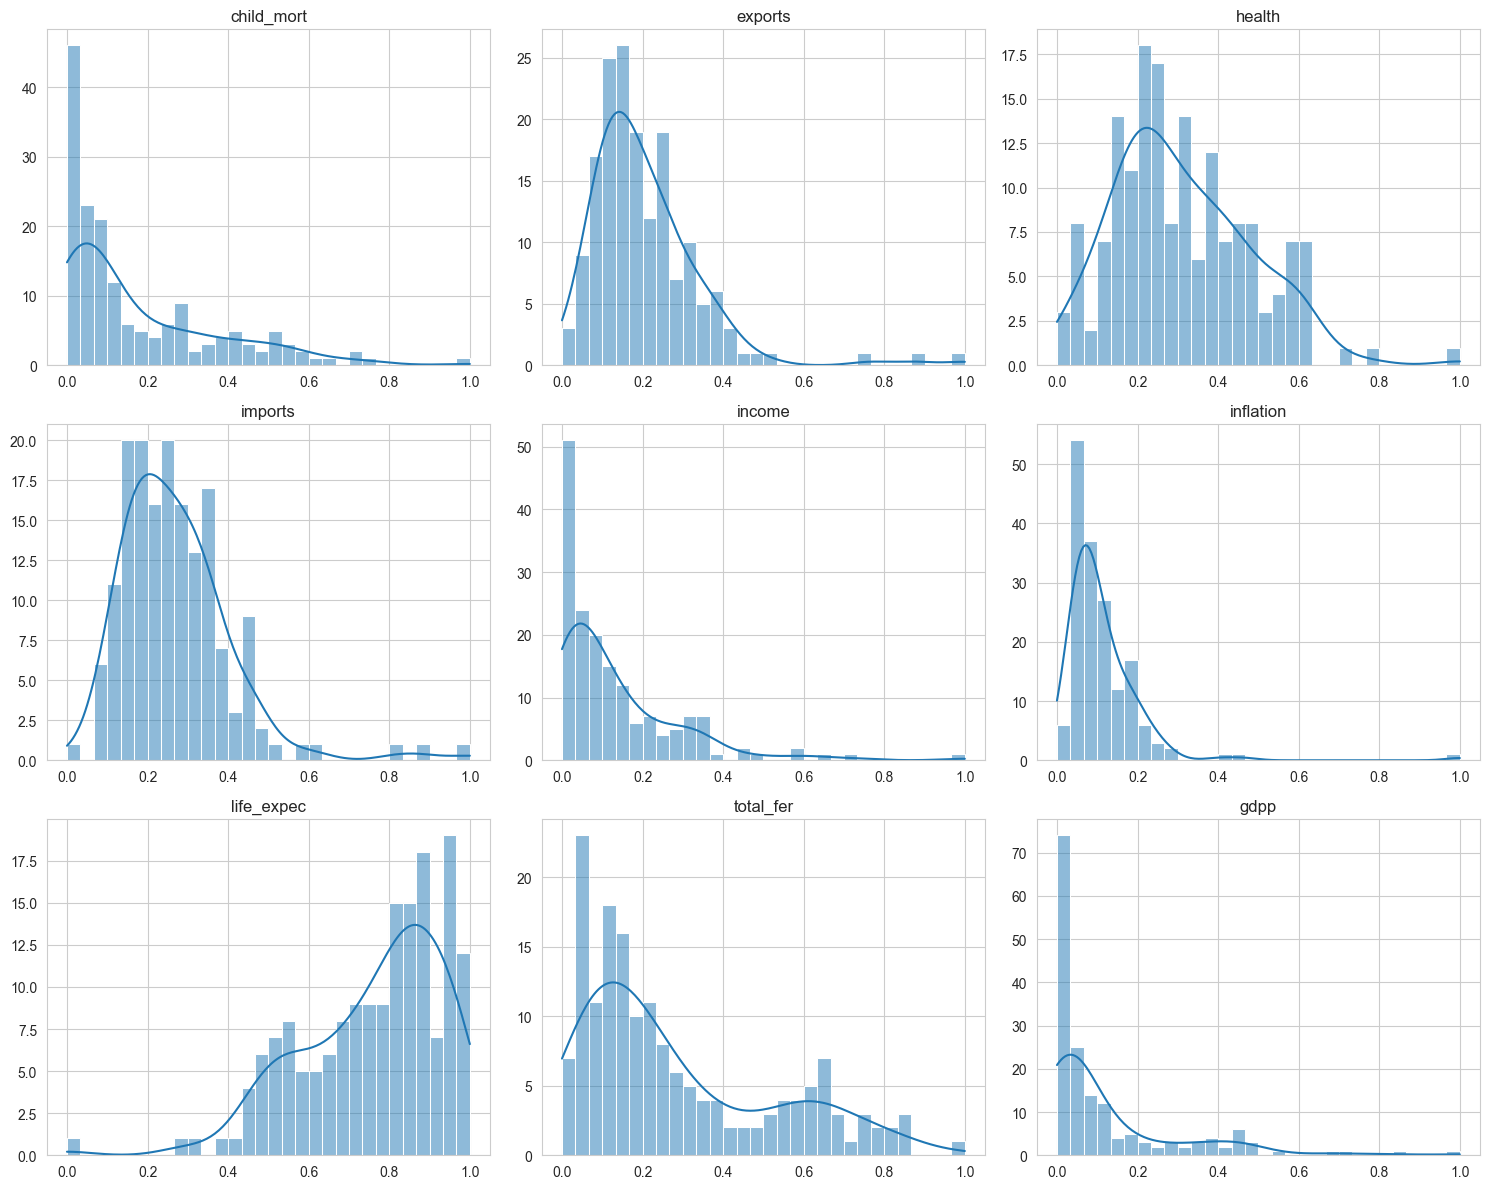

In [201]:
plot_all_histograms(df2)

In [202]:
from sklearn.decomposition import PCA
pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca_df2

,0,1,2,3,4,5,6,7,8
0,0.599078,0.095490,0.157554,0.024333,0.045618,-0.046532,-0.076803,-0.040610,0.023572
1,-0.158474,-0.212092,-0.064189,0.061247,-0.014191,-0.010246,0.043567,-0.030842,0.029833
2,-0.003686,-0.135867,-0.134182,-0.133574,0.091150,0.025988,0.045604,0.010198,0.003012
3,0.650235,0.275975,-0.142672,-0.156018,0.081997,0.032170,0.073985,0.045195,-0.042241
4,-0.200711,-0.064662,-0.100715,0.037902,0.035799,-0.055817,0.009559,-0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,0.160078,-0.029625,-0.121910,0.066099,0.009043,-0.063646,-0.115254,0.003232,-0.065701
163,-0.061133,-0.171339,-0.058586,-0.247460,0.093260,0.291515,-0.005521,-0.056038,-0.036459
164,-0.115512,-0.032034,-0.195243,0.231993,0.035734,0.089237,0.039743,0.006124,-0.017780
165,0.332968,-0.019824,-0.029989,-0.105416,0.141550,0.063254,-0.012519,-0.014231,-0.011441


In [203]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

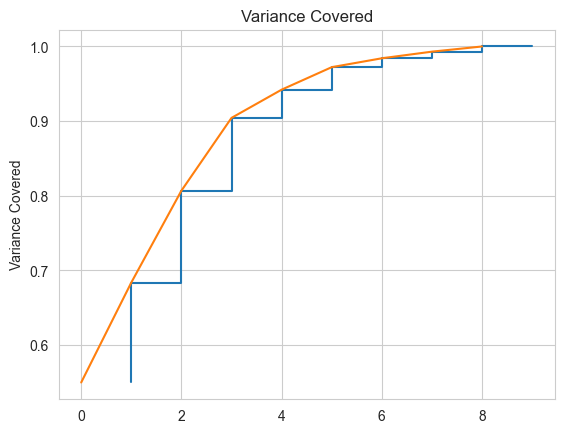

In [204]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Variance Covered")
plt.title("Variance Covered")
plt.show()

In [205]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])

In [206]:
pca_df2

,0,1,2
0,0.599078,0.095490,0.157554
1,-0.158474,-0.212092,-0.064189
2,-0.003686,-0.135867,-0.134182
3,0.650235,0.275975,-0.142672
4,-0.200711,-0.064662,-0.100715
...,...,...,...
162,0.160078,-0.029625,-0.121910
163,-0.061133,-0.171339,-0.058586
164,-0.115512,-0.032034,-0.195243
165,0.332968,-0.019824,-0.029989


In [207]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df2)
    wcss.append(kmeans.inertia_)

In [208]:
wcss

[34.53302925308176,
 17.685954209577083,
 11.270622261541495,
 9.756121194869419,
 7.2751574785454975,
 6.291119784013114,
 5.72528886597816,
 4.923499995667272,
 4.979639812596874,
 4.023292285659165]

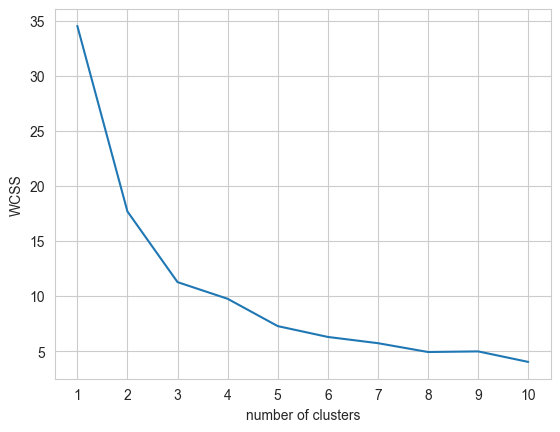

In [209]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [210]:
model = KMeans(n_clusters=3)
model.fit(pca_df2)

KMeans(n_clusters=3)

In [211]:
labels = model.labels_

In [212]:
silhouette_score(pca_df2,labels)

np.float64(0.43863203452366833)

In [213]:
df['Class'] = labels

In [214]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


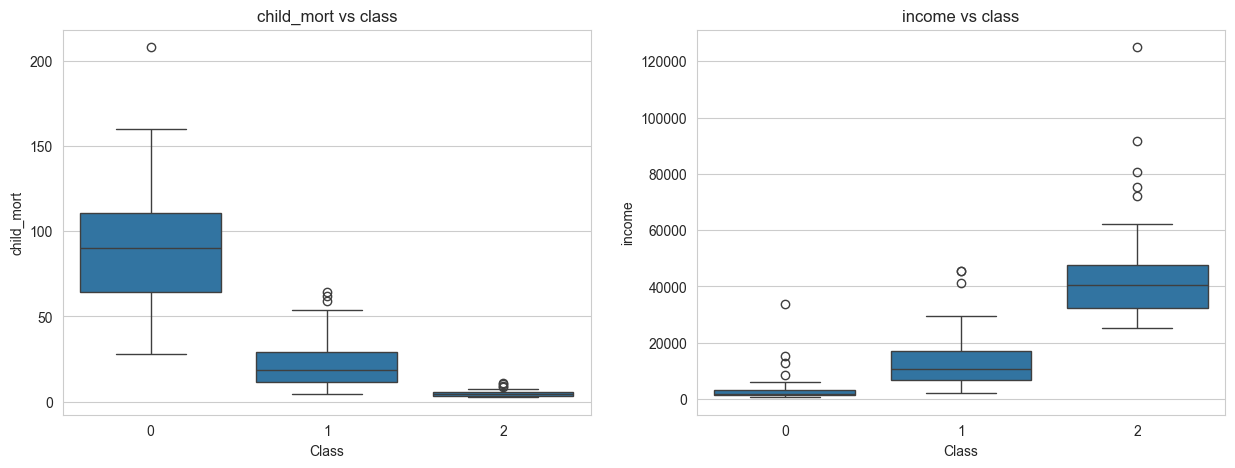

In [215]:
fig, ax = plt.subplots(nrows = 1, ncols= 2 , figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Class", y="child_mort")
plt.title("child_mort vs class")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Class", y="income")
plt.title("income vs class")

plt.show()

In [216]:
# 2 -> no budget needed
# 1 -> budget needed
# 0 -> in between

In [217]:
import plotly.express as px

In [218]:
pca_df2.insert(0, column= "Country", value = df['country'])
pca_df2['Class'] = labels
pca_df2.loc[pca_df2['Class'] == 1, 'Class'] = "Budget Needed"
pca_df2.loc[pca_df2['Class'] == 2, 'Class'] = "No Budget Needed"
pca_df2.loc[pca_df2['Class'] == 0, 'Class'] = "In Between"

/var/folders/0h/_3vs5ymj39b11nq0qq82kq2m0000gn/T/ipykernel_63509/399570754.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Budget Needed' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



In [219]:
pca_df2

,Country,0,1,2,Class
0,Afghanistan,0.599078,0.095490,0.157554,In Between
1,Albania,-0.158474,-0.212092,-0.064189,Budget Needed
2,Algeria,-0.003686,-0.135867,-0.134182,Budget Needed
3,Angola,0.650235,0.275975,-0.142672,In Between
4,Antigua and Barbuda,-0.200711,-0.064662,-0.100715,Budget Needed
...,...,...,...,...,...
162,Vanuatu,0.160078,-0.029625,-0.121910,Budget Needed
163,Venezuela,-0.061133,-0.171339,-0.058586,Budget Needed
164,Vietnam,-0.115512,-0.032034,-0.195243,Budget Needed
165,Yemen,0.332968,-0.019824,-0.029989,In Between


In [220]:
fig = px.choropleth(
    pca_df2[['Country', 'Class']],
    locationmode = "country names",
    locations = "Country",
    title = "Needed Budget by Country",
    color = pca_df2['Class'],
    color_discrete_map= {
                        "Budget Needed" : "Red",
                        "In Between" : "Yellow",
                        "No Budget Needed": "Green"
    })
fig.update_geos(fitbounds = "locations", visible = True)
fig.show()

In [221]:
# Hierarchical Clustering

In [222]:
df_hc= df.drop("Class", axis=1)

In [223]:
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [224]:
scaler = MinMaxScaler()
df_hc = df_hc.drop("country", axis=1)
X = scaler.fit_transform(df_hc)
pca = PCA(n_components=3)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns = ["PC1", "PC2", "PC3"])


In [225]:
X

,PC1,PC2,PC3
0,0.599078,0.095490,0.157554
1,-0.158474,-0.212092,-0.064189
2,-0.003686,-0.135867,-0.134182
3,0.650235,0.275975,-0.142672
4,-0.200711,-0.064662,-0.100715
...,...,...,...
162,0.160078,-0.029625,-0.121910
163,-0.061133,-0.171339,-0.058586
164,-0.115512,-0.032034,-0.195243
165,0.332968,-0.019824,-0.029989


In [226]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4)
y_hc = hc.fit_predict(X)
y_hc

array([3, 1, 2, 3, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 3, 2, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 0, 2, 3, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1,
       0, 1, 1, 2, 1, 3, 2, 1, 2, 0, 0, 2, 3, 1, 0, 2, 0, 1, 2, 3, 3, 2,
       3, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 3,
       3, 1, 1, 0, 1, 2, 3, 1, 1, 3, 0, 3, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2,
       0, 0, 3, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1,
       3, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 3, 2, 1, 1,
       2, 3, 1, 0, 0, 0, 1, 2, 2, 1, 1, 2, 3])

In [227]:
print(silhouette_score(X, y_hc))

0.3200383188841681


In [228]:
X['Class'] = pd.DataFrame(y_hc)

In [229]:
X.insert(0, column= "Country", value = df['country'])


In [230]:
X

,Country,PC1,PC2,PC3,Class
0,Afghanistan,0.599078,0.095490,0.157554,3
1,Albania,-0.158474,-0.212092,-0.064189,1
2,Algeria,-0.003686,-0.135867,-0.134182,2
3,Angola,0.650235,0.275975,-0.142672,3
4,Antigua and Barbuda,-0.200711,-0.064662,-0.100715,1
...,...,...,...,...,...
162,Vanuatu,0.160078,-0.029625,-0.121910,2
163,Venezuela,-0.061133,-0.171339,-0.058586,1
164,Vietnam,-0.115512,-0.032034,-0.195243,1
165,Yemen,0.332968,-0.019824,-0.029989,2


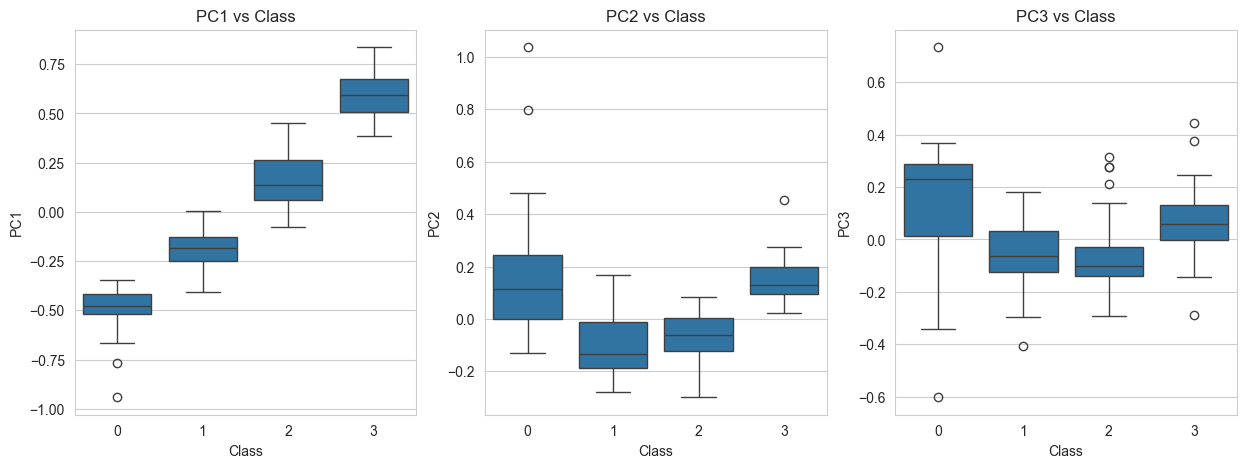

In [233]:
fig, ax = plt.subplots(nrows = 1, ncols= 3 , figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=X, x="Class", y="PC1")
plt.title("PC1 vs Class")

plt.subplot(1,3,2)
sns.boxplot(data=X, x="Class", y="PC2")
plt.title("PC2 vs Class")

plt.subplot(1,3,3)
sns.boxplot(data=X, x="Class", y="PC3")
plt.title("PC3 vs Class")

plt.show()